En ciudades pequeñas, es importante asegurar una distribución adecuada de servicios esenciales como colegios, droguerías, centros médicos, entre otros. Una mala localización puede generar áreas de baja cobertura, afectando la calidad de vida de los habitantes. Para evaluar esta situación, se puede utilizar un modelo espacial que tome en cuenta tanto la localización de los establecimientos existentes como la densidad de población de la ciudad.

Este programa simula un pequeño plano urbano, donde se ubican varios servicios (como droguerías o colegios) y se genera un campo de densidad poblacional, más concentrado en el centro de la ciudad. Utilizando un Diagrama de Voronoi, se delimitan las áreas de influencia de cada establecimiento. Se visualiza gráficamente la combinación de la densidad de población con las regiones de Voronoi, permitiendo identificar posibles zonas donde podría faltar cobertura de servicios, basado en el tamaño de las áreas y la concentración de población.


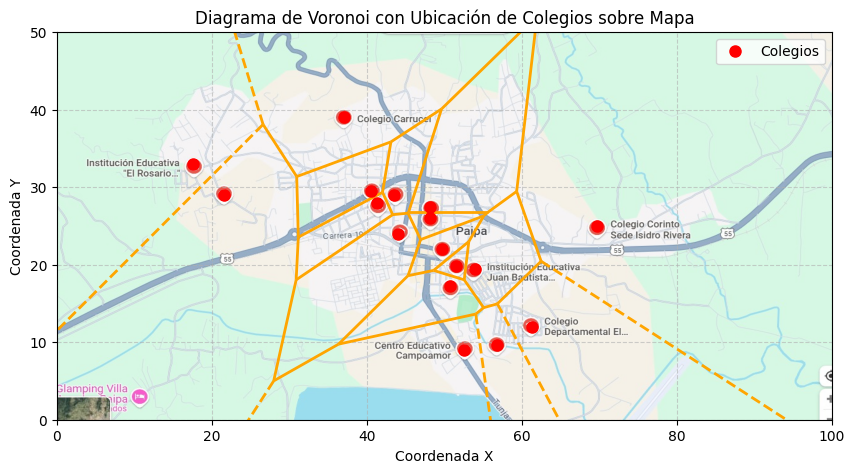

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib import cm

# --- Configuración inicial ---
city_size = (100, 50) # Define el tamaño de tu "ciudad" o área del mapa

# Coordenadas de las "droguerías"
locations = np.array([
    [17.5, 33],
    [21.5, 29],
    [37, 39],
    [40.5, 29.5],
    [41.3,28],
    [43.5, 29],
    [44,24],
    [48.2, 26],
    [48.2, 27.5],
    [49.7, 22],
    [51.5,19.8],
    [54,19.5],
    [50.7,17.2],
    [69.7, 25],
    [61.3, 12],
    [56.8, 9.6],
    [52.5,9]
])

# --- Carga de la imagen del mapa ---
# ¡IMPORTANTE! Reemplaza 'ruta/a/tu/mapa.png' con la ruta real de tu archivo de imagen.
# Asegúrate de que la imagen sea relevante para tu 'city_size'.
try:
    map_image = plt.imread('/paipa.33.19 AM.jpeg')
except FileNotFoundError:
    print("Error: La imagen del mapa no se encontró. Asegúrate de que la ruta sea correcta.")
    print("Continuando sin la imagen del mapa. Por favor, actualiza la ruta en el código.")
    map_image = None # Establece map_image a None para que el código no falle

# --- Cálculo de la densidad (opcional, si aún la necesitas) ---
# Si tu mapa ya representa la densidad, puedes considerar remover esta parte.
x = np.linspace(0, city_size[0], city_size[0])
y = np.linspace(0, city_size[1], city_size[1])
X, Y = np.meshgrid(x, y)
density = np.exp(-((X - city_size[0]/2)**2 + (Y - city_size[1]/2)**2) / 800)

# --- Creación del diagrama de Voronoi ---
vor = Voronoi(locations)

# --- Configuración del gráfico ---
fig, ax = plt.subplots(figsize=(10,10)) # Aumentamos el tamaño para mejor visualización

# 1. Mostrar la imagen del mapa (primera capa)
if map_image is not None:
    # 'extent' es crucial para posicionar la imagen correctamente.
    # Debe coincidir con los límites de tu espacio (city_size).
    ax.imshow(map_image, extent=(0, city_size[0], 0, city_size[1]), origin='upper', alpha=0.9)


# 3. Dibujar el diagrama de Voronoi
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=2, point_size=1)

# 4. Dibujar los puntos de las droguerías
ax.plot(locations[:,0], locations[:,1], 'ro', markersize=8, label='Colegios') # Aumentamos markersize

# --- Ajustes finales del gráfico ---
ax.set_xlim(0, city_size[0])
ax.set_ylim(0, city_size[1])
ax.set_title('Diagrama de Voronoi con Ubicación de Colegios sobre Mapa')
ax.set_xlabel('Coordenada X')
ax.set_ylabel('Coordenada Y')
ax.legend()
ax.set_aspect('equal', adjustable='box') # Mantiene la proporción de los ejes para que el mapa no se distorsione
plt.grid(True, linestyle='--', alpha=0.6) # Añadir una cuadrícula para referencia
plt.show()